# Cluster Analysis

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the [UCI](https://archive.ics.uci.edu/ml/datasets/iris) Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species


## Load and Inspect Data

1. Load the file for this week's analysis:
```
iris.csv
```
2. Measure the correlation coefficient between the features
 - plot a correlation heatmap and/or a scatter matrix


## K-Means Cluster Analysis

1. Use K-Means clustering with a cluster count of k=3
2. Compare the results of the clustering to the actual labels
3. Evaluate the results using the following metrics:
 - Homogeneity
 - Completeness
 - V Measure
 - Silhouette
3. Use the elbow method to decide the optimal k (time permitting)

## Hierarchical Clustering

Use 3 clusters to perform a Hierarchical clustering analysis.  Run the cluster analysis using the following Linkage techniques:
 - **Ward**: minimize variance within clusters
 - **Complete**: minimize the maximum distances between pairs
 - **Average**: minimize average distances between points
 - **Single**: minimize distance between closest points from a pair of clusters

## Summarize Results

Compare the results of all techniques.

In [118]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import prettytable
%matplotlib inline

## Custom Evaluation Function

You can use the following function to evaluate the accuracy of the model:

In [75]:
from sklearn import metrics
def evaluate(model, s, labels_true):
    labels_pred = model.labels_
    
    homogeneity = metrics.homogeneity_score(labels_true, labels_pred)
    completeness = metrics.completeness_score(labels_true, labels_pred)
    v_measure = metrics.v_measure_score(labels_true, labels_pred)
    silhouette = metrics.silhouette_score(s,labels_pred)

    pt = prettytable.PrettyTable(['metric','value'])
    pt.add_row(['Homogeneity', homogeneity])
    pt.add_row(['Completeness', completeness])
    pt.add_row(['V Measure', v_measure])
    pt.add_row(['Silhouette', silhouette])
    print(pt)
    d = {'homogeneity': homogeneity,
         'completeness':completeness,
         'v_measure':v_measure,
         'silhouette':silhouette
        }
    return d
    

In [3]:
location = '../../data/'
files = os.listdir(location)
files

['responses.csv',
 'CrossStats20150102.txt',
 'auto_2020.xlsx',
 'multiple_choice.csv',
 'iris_names.txt',
 'state_codes.csv',
 'iris.csv',
 'nst-est2019-popchg2010-2019.pdf',
 'roster_with_score.csv',
 'questions.csv',
 'mount_rainier_daily.csv',
 'COVID_by_State.csv',
 'Candidate Assessment.xlsx',
 'Candidate Assessment.xls',
 'nst-est2019-popchg2010_2019.csv']

## Load and Inspect Data

1. Load the file for this week's analysis:
```
iris.csv
```
2. Measure the correlation coefficient between the features
 - plot a correlation heatmap and/or a scatter matrix

In [5]:
df = pd.read_csv(location + 'iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df['class'] = df['class'].astype('category')

### Compute Correlation Matrix

Take the following steps:

1. Create a dataframe ```s``` containing the raw data without a class label  
2. Compute the correlation matrix rounded to 2 digits to produce a nicely annotated correlation plot  

In [6]:
s = df[['sepal_length','sepal_width','petal_length','petal_width']]

In [87]:
C = round(s.corr(),2)
C

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


In [108]:
labels = list(C.columns.values)
labels

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [109]:
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(C.values, x=labels, y=labels,
                                 colorscale=["blue", "white", "red"])
fig.show()

### Scatter Matrix

Produce a scatter matrix with color separation by class.

In [113]:
fig = px.scatter_matrix(df,
                        color='class',
                        title='Scatter Matrix of Iris Features')
fig.update_layout(
    dragmode='select',
    width=800,
    height=800,
    hovermode='closest',
)
fig.show()

## K-Means Cluster Analysis

1. Use K-Means clustering with a cluster count of k=3
2. Compare the results of the clustering to the actual labels
3. Use the elbow method to decide the optimal k

In [116]:
from sklearn.cluster import KMeans
k=3
model = KMeans(n_clusters=k).fit(s)
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Compare The Results to Actual Labels

We'll place the centroids into a dataframe.  Append that DataFrame to the data and plot a new scatter plot.

In [117]:
k_means_df = pd.DataFrame(model.cluster_centers_, columns=s.columns)
k_means_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


### Note

The centroids appear quite distinct for each class.

In [123]:
k_means_df['class'] = ['k_center_0','k_center_1','k_center_2']
k_means_df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.901613,2.748387,4.393548,1.433871,k_center_0
1,5.006000,3.418000,1.464000,0.244000,k_center_1
2,6.850000,3.073684,5.742105,2.071053,k_center_2


In [124]:
tmp = df.append(k_means_df)
tmp.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
148,6.200000,3.400000,5.400000,2.300000,Iris-virginica
149,5.900000,3.000000,5.100000,1.800000,Iris-virginica
0,5.901613,2.748387,4.393548,1.433871,k_center_0
1,5.006000,3.418000,1.464000,0.244000,k_center_1
2,6.850000,3.073684,5.742105,2.071053,k_center_2


In [125]:
fig = px.scatter_matrix(tmp,
                        color='class',
                        title='Scatter Matrix of Iris Features')
fig.update_layout(
    dragmode='select',
    width=800,
    height=800,
    hovermode='closest',
)
fig.show()

### Interpretation

It looks like the following labels were inferred by the K-Means algorithm:

- 0: Iris Versicolor
- 1: Iris Setosa
- 2: Iris Virginica

# Evaluate The Results

1. Homogeneity -- expect 0 to 1
2. Completeness -- expect 0 to 1
3. V Measure -- expect 0 to 1
4. Silhouette -- expect -1 to 1

In [24]:
labels_pred = model.predict(s)
labels_true = df['class'].values

### Homogeneity

Each cluster contains only members of a single class:

In [29]:
metrics.homogeneity_score(labels_true, labels_pred)

0.7514854021988339

### Completeness

In [28]:
metrics.completeness_score(labels_true, labels_pred)

0.7649861514489816

### V Measure

Balance between homogeneity and completeness

$$
v = \frac{\text{homogeneity} \times \text{completeness}}{\text{homogeneity} + \text{completeness}}
$$

In [33]:
metrics.v_measure_score(labels_true, labels_pred, beta=1.0)

0.7581756800057786

### Silhouette

The silhouette looks at the ratio of  

$$
s_i = \frac{\bar{b}_i - \bar{a}_i}{max(a_i,b_i)}
$$

In [37]:
labels_true_code = df['class'].cat.codes.values
labels_true_code

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [40]:
metrics.silhouette_score(s,labels_pred)

0.5525919445499755

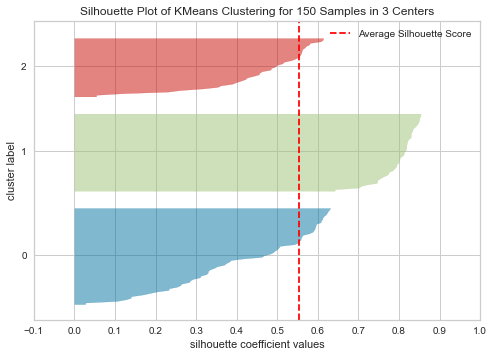

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [126]:
from yellowbrick.cluster import SilhouetteVisualizer

# Specify the features to use for clustering
features = list(s.columns)
X = s.values

# Instantiate the clustering model and visualizer
#model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Interpretation

If we recall the labels inferred above:

- 0: Iris Versicolor
- 1: Iris Setosa
- 2: Iris Virginica

It looks like the Iris Setosa is the most clearly delineated category.



### Use the Evaluate Function

In [127]:
k_means_eval = evaluate(model, s, labels_true)

+--------------+--------------------+
|    metric    |       value        |
+--------------+--------------------+
| Homogeneity  | 0.7514854021988339 |
| Completeness | 0.7649861514489816 |
|  V Measure   | 0.7581756800057786 |
|  Silhouette  | 0.5525919445499755 |
+--------------+--------------------+


# Elbow method

# Inertia

Distance within cluster sum of squares

$$
\sum_{i=0}^n min(||x_i - \mu_j||^2)
$$


In [43]:

K = list(range(2,10))
I = [] # Inertia
for k in K:
    kmeans = KMeans(n_clusters=k).fit(s)
    labels_pred = kmeans.predict(s)
    I += [kmeans.inertia_]
    ch = metrics.calinski_harabasz_score(s, kmeans.labels_)
    CH += [ch]

In [44]:
fig = px.line(x=K,y=I,
             labels={'x':'Cluster Count (k)',
                    'y':'Inertia'},
             title='Elbow Method Using Inertia')
fig.show()

# Hierarchical Clustering

Use 3 clusters to perform a Hierarchical clustering analysis.  Run the cluster analysis using the following Linkage techniques:

 - **Ward**: minimize variance within clusters
 - **Complete**: minimize the maximum distances between pairs
 - **Average**: minimize average distances between points
 - **Single**: minimize distance between closest points from a pair of clusters


In [48]:
from sklearn.cluster import AgglomerativeClustering

In [129]:
results = []
k=3
techniques = ['ward','single','average','complete']
for technique in techniques:
    
    model = AgglomerativeClustering(n_clusters=k,
                               linkage=technique).fit(s)
    print('-------\n%s\nbin count: %s' % (technique, np.bincount(model.labels_)))
    fig = px.scatter_matrix(s,
                        color=model.labels_,
                        color_continuous_scale=['red','green'],
                        title='Scatter Matrix of Iris Features<br>Linkage: %s' % technique)
    fig.update_layout(
        dragmode='select',
        width=600,
        height=600,
        hovermode='closest',
    )
    fig.show()
    print('------\nresult\n%s' % technique)
    r = evaluate(model,s, df['class'].values)
    r['technique'] = technique
    results += [r]
    print('======')
    
    

-------
ward
bin count: [64 50 36]


------
result
ward
+--------------+--------------------+
|    metric    |       value        |
+--------------+--------------------+
| Homogeneity  | 0.7608008469718723 |
| Completeness | 0.7795958005591144 |
|  V Measure   | 0.7700836616487869 |
|  Silhouette  | 0.5540972908150551 |
+--------------+--------------------+
-------
single
bin count: [98 50  2]


------
result
single
+--------------+--------------------+
|    metric    |       value        |
+--------------+--------------------+
| Homogeneity  | 0.5879164116696249 |
| Completeness | 0.9202400768446993 |
|  V Measure   | 0.7174643320814477 |
|  Silhouette  | 0.5118387098922372 |
+--------------+--------------------+
-------
average
bin count: [64 50 36]


------
result
average
+--------------+--------------------+
|    metric    |       value        |
+--------------+--------------------+
| Homogeneity  | 0.7959816227812412 |
| Completeness | 0.8156456882407057 |
|  V Measure   | 0.805693691215336  |
|  Silhouette  | 0.5539343898551249 |
+--------------+--------------------+
-------
complete
bin count: [72 50 28]


------
result
complete
+--------------+--------------------+
|    metric    |       value        |
+--------------+--------------------+
| Homogeneity  | 0.7001154370964626 |
| Completeness | 0.7454382753016932 |
|  V Measure   | 0.7220663465703592 |
|  Silhouette  | 0.5133502348448075 |
+--------------+--------------------+


# Summarize

Let's summarize the performance of the various models:

In [130]:
k_means_eval['technique'] = 'K-Means'

In [131]:
results += [k_means_eval]

In [133]:
res = pd.DataFrame(results)
res

,homogeneity,completeness,v_measure,silhouette,technique
0,0.760801,0.779596,0.770084,0.554097,ward
1,0.587916,0.920240,0.717464,0.511839,single
2,0.795982,0.815646,0.805694,0.553934,average
3,0.700115,0.745438,0.722066,0.513350,complete
4,0.751485,0.764986,0.758176,0.552592,K-Means


In [134]:
fig = px.bar(res, x='technique',y='v_measure')
fig.show()